<a href="https://colab.research.google.com/github/mabdelrehim/airbnb-new-users-kaggle/blob/master/airbnb_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget -O "archive.zip" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4651/35131/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589221310&Signature=lNeb%2FFjb%2BuFlb6o4GC5YlpzPqyezczyyRrQLfb2z2RDIflTrEjMy7wuuzoSGSnfpaSonqZqAVCrs%2FB8RPJsD5czI3bwfWSwg4M2dMvjZ1QuM3Ap7Rz327F7xaCaTrKdynetaCbLN0W3790pVtZheg8%2FbZzBUPOzFcGpBdxOVRXxsWrU%2BvKDvf67hV3T3hKE5OxVodHi7oCDAba28oP3MKCVtEh9cAveLSCdXNwydWEYN62be%2F2jixx9v%2F%2FrxxMhqVHLJOR5AoGK3iupZuzohZ7eYMTBeJGhryLW6DJiKrt9N20pHr1TExDDGHo9q3EfpXuyGsAWXD110KZjUHF9NNw%3D%3D&response-content-disposition=attachment%3B+filename%3Dairbnb-recruiting-new-user-bookings.zip"
!mkdir "data"
!mkdir "zipped-files"
!unzip "archive.zip" -d "zipped-files"
!unzip "zipped-files/age_gender_bkts.csv.zip" -d "data"
!unzip "zipped-files/countries.csv.zip" -d "data"
!unzip "zipped-files/sample_submission_NDF.csv.zip" -d "data"
!unzip "zipped-files/sessions.csv.zip" -d "data"
!unzip "zipped-files/test_users.csv.zip" -d "data"
!unzip "zipped-files/train_users_2.csv.zip" -d "data"

--2020-05-08 18:22:16--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4651/35131/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589221310&Signature=lNeb%2FFjb%2BuFlb6o4GC5YlpzPqyezczyyRrQLfb2z2RDIflTrEjMy7wuuzoSGSnfpaSonqZqAVCrs%2FB8RPJsD5czI3bwfWSwg4M2dMvjZ1QuM3Ap7Rz327F7xaCaTrKdynetaCbLN0W3790pVtZheg8%2FbZzBUPOzFcGpBdxOVRXxsWrU%2BvKDvf67hV3T3hKE5OxVodHi7oCDAba28oP3MKCVtEh9cAveLSCdXNwydWEYN62be%2F2jixx9v%2F%2FrxxMhqVHLJOR5AoGK3iupZuzohZ7eYMTBeJGhryLW6DJiKrt9N20pHr1TExDDGHo9q3EfpXuyGsAWXD110KZjUHF9NNw%3D%3D&response-content-disposition=attachment%3B+filename%3Dairbnb-recruiting-new-user-bookings.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67874908 (65M) [application/zip]
Saving to: ‘archive.zip’

archive.zip        

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization and Wrangling

In [0]:
train_users = pd.read_csv("data/train_users_2.csv")
test_users = pd.read_csv("data/test_users.csv")
country_stats = pd.read_csv("data/countries.csv")
sessions = pd.read_csv("data/sessions.csv")
age_gender_stats = pd.read_csv("data/age_gender_bkts.csv")


## Country Visits Statistics
Some visualizations on the age-gender available data.

### Number of Visits for Each Country

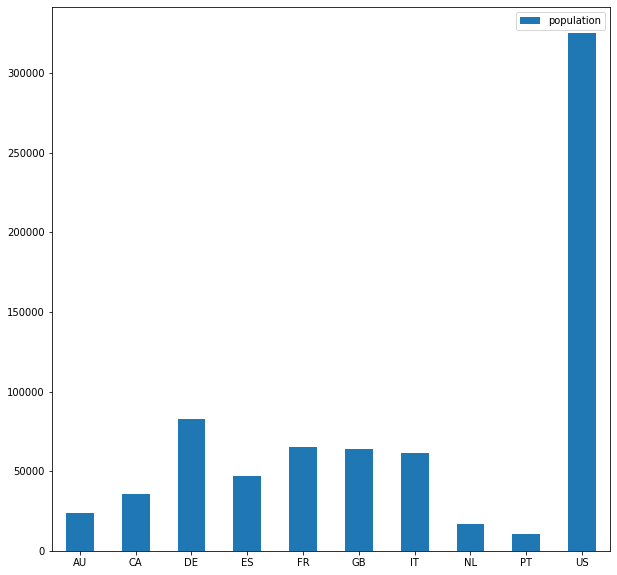

In [3]:
# gender based
country_buckets = age_gender_stats['country_destination'].unique()
population = []

for bucket in country_buckets:
    population.append(
        age_gender_stats.loc[(age_gender_stats['country_destination'] == bucket)]['population_in_thousands'].sum()
    )
pd.DataFrame({'population': population}, index=country_buckets).plot.bar(rot=0, figsize=(10,10))

### Visits Gender Distribution for Each Country 

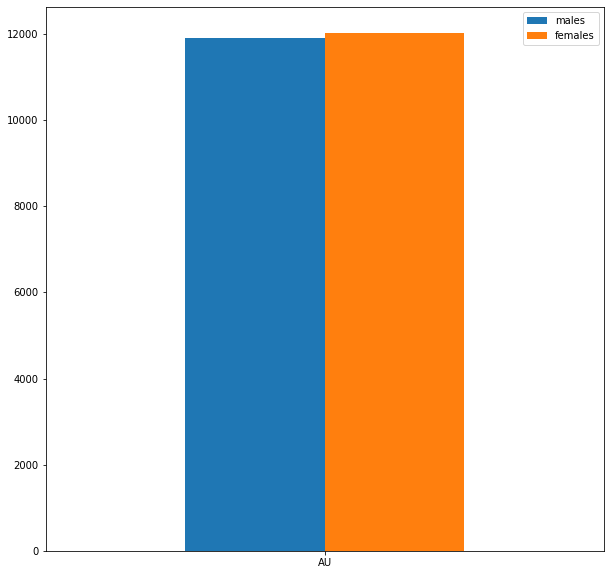

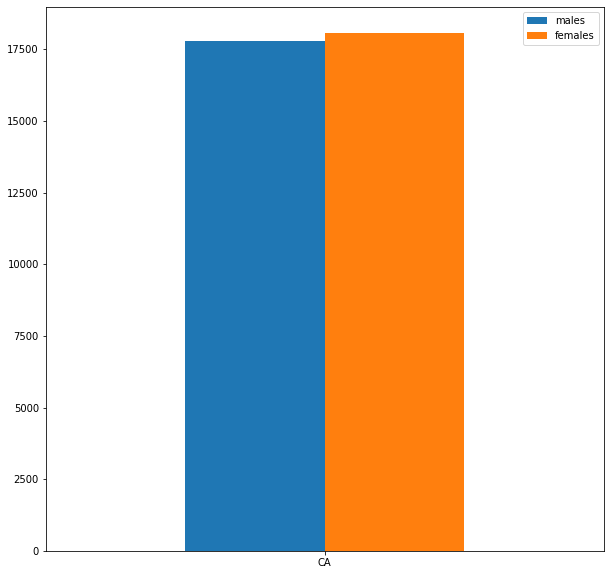

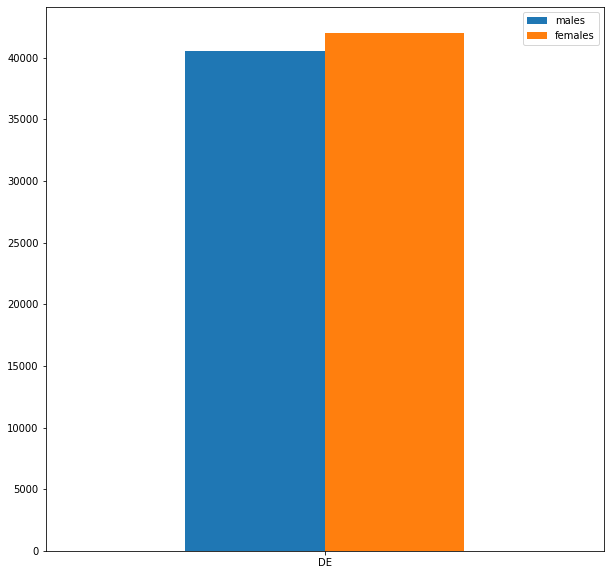

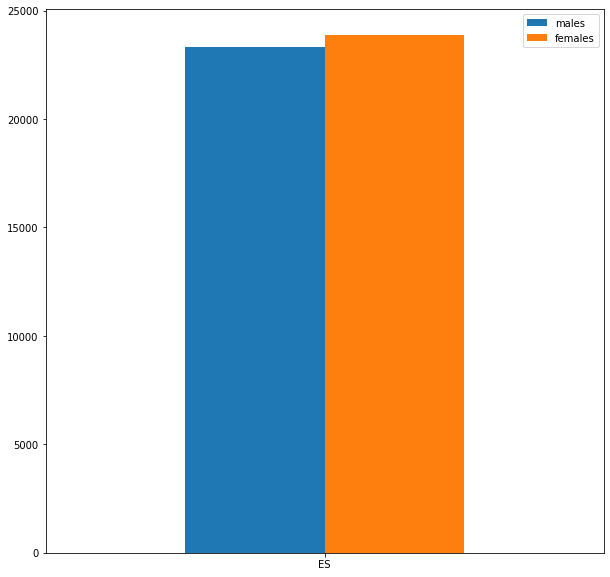

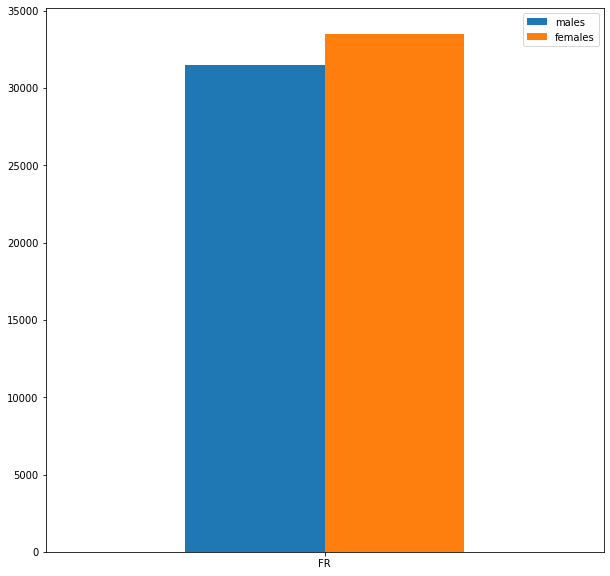

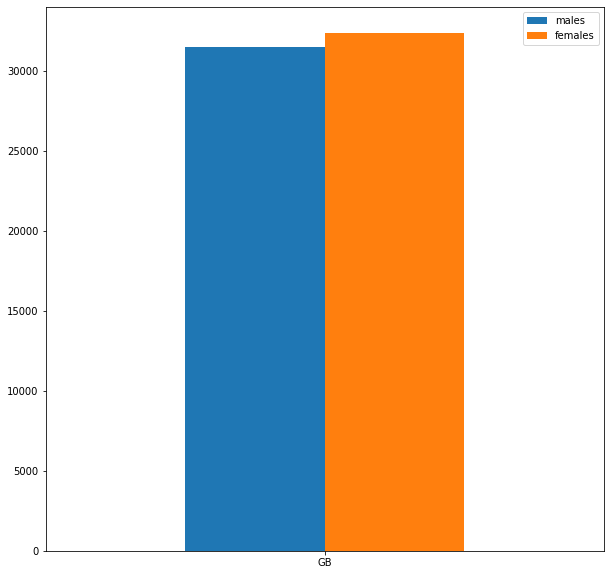

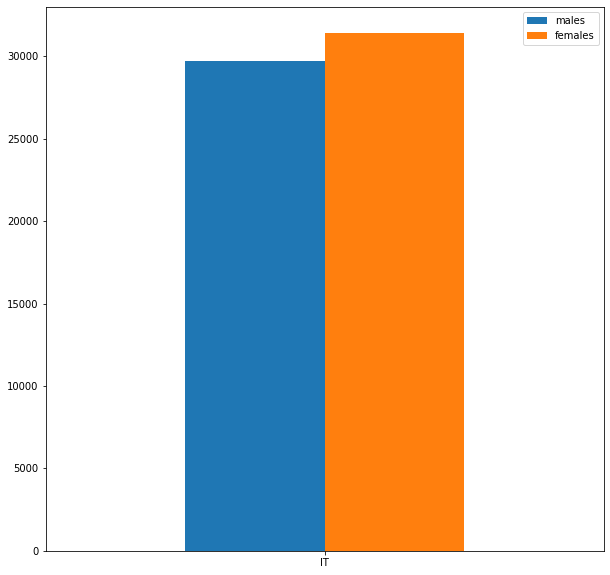

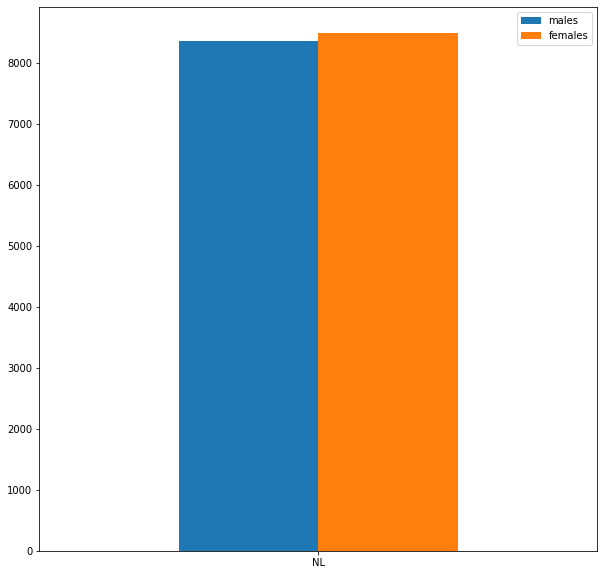

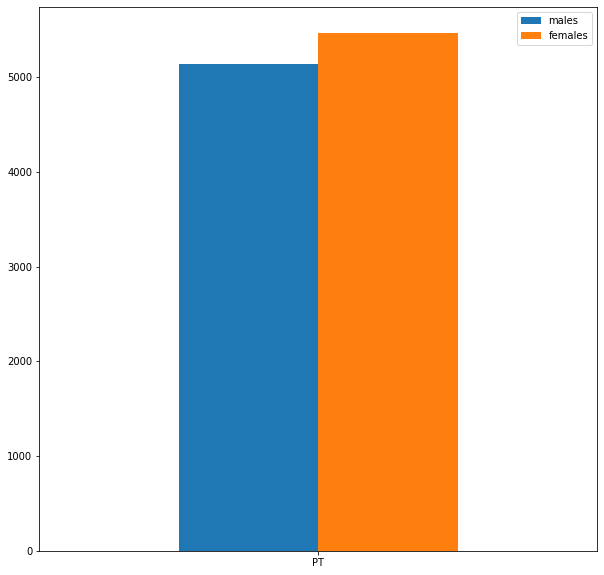

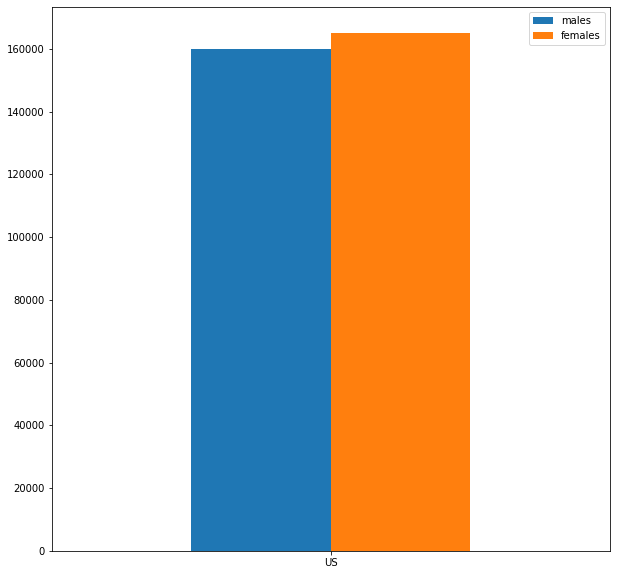

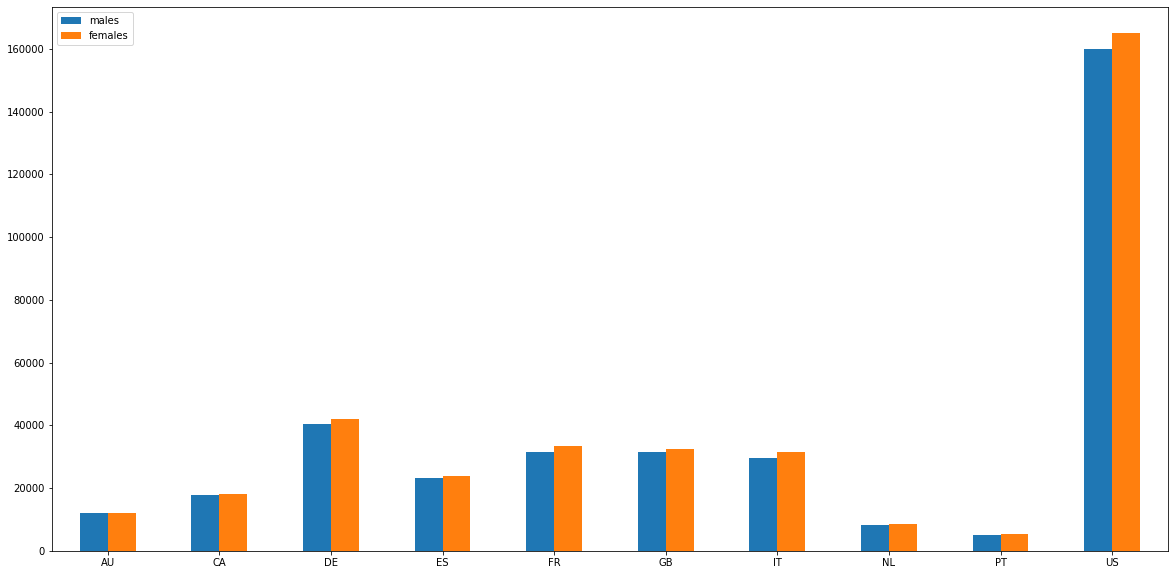

In [4]:
# gender based
country_buckets = age_gender_stats['country_destination'].unique()
males = []
females = []

for bucket in country_buckets:
    males.append(
        age_gender_stats.loc[(age_gender_stats['country_destination'] == bucket) & (age_gender_stats['gender'] == "male")]['population_in_thousands'].sum()
    )
    females.append(
        age_gender_stats.loc[(age_gender_stats['country_destination'] == bucket) & (age_gender_stats['gender'] == "female")]['population_in_thousands'].sum()
    )
    pd.DataFrame({'males': males[-1], 'females': females[-1]}, index=[bucket]).plot.bar(rot=0, figsize=(10,10))
pd.DataFrame({'males': males, 'females': females}, index=country_buckets).plot.bar(rot=0, figsize=(20,10))

### Country Visits Distribution for Each Age Group

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


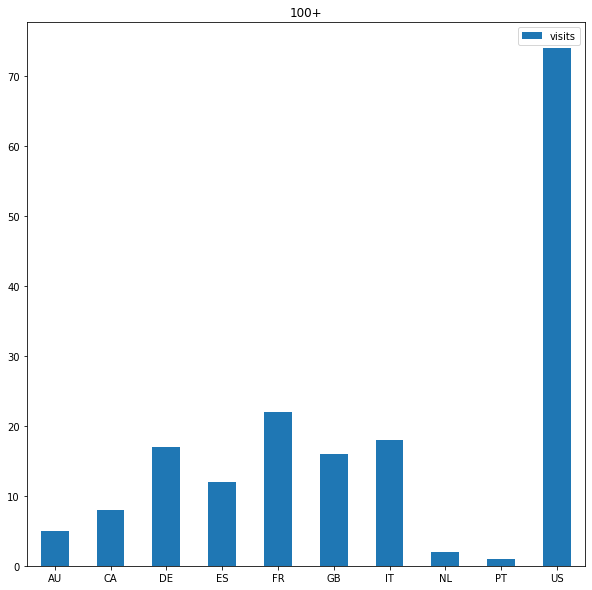

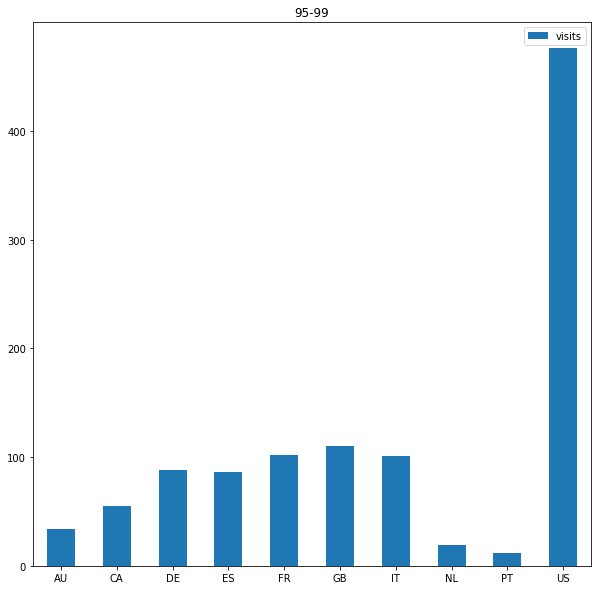

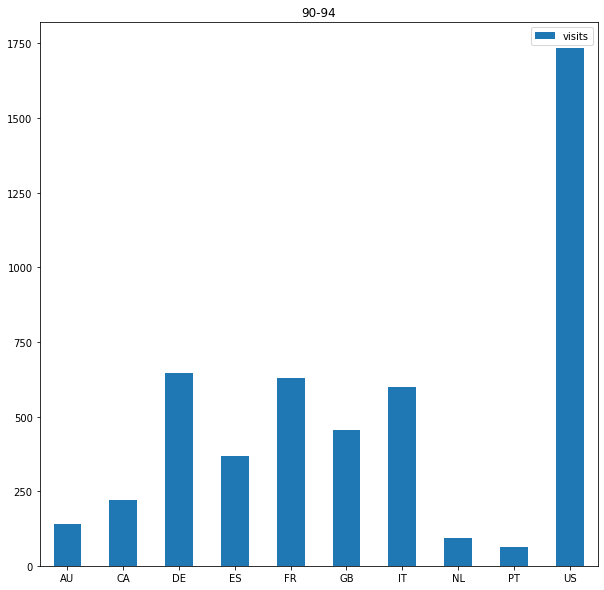

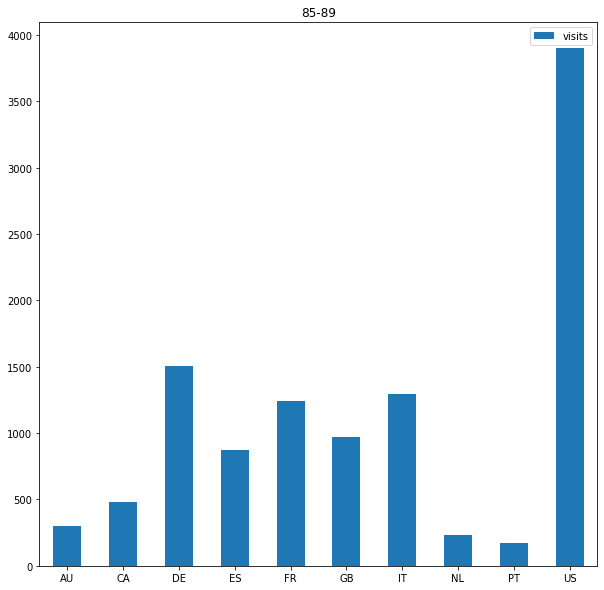

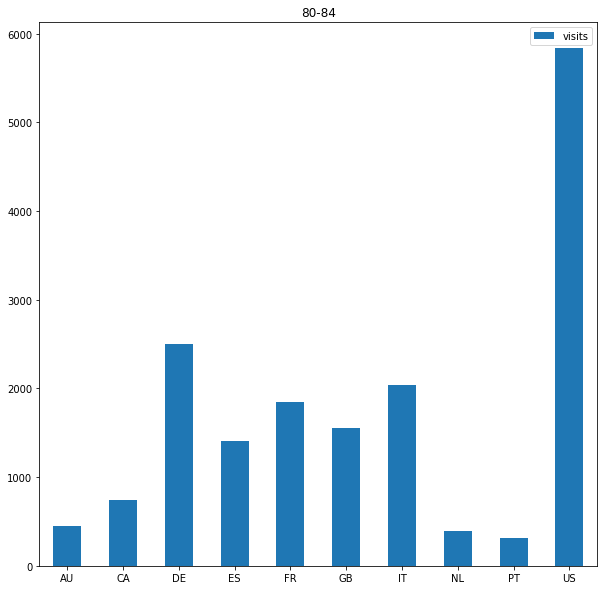

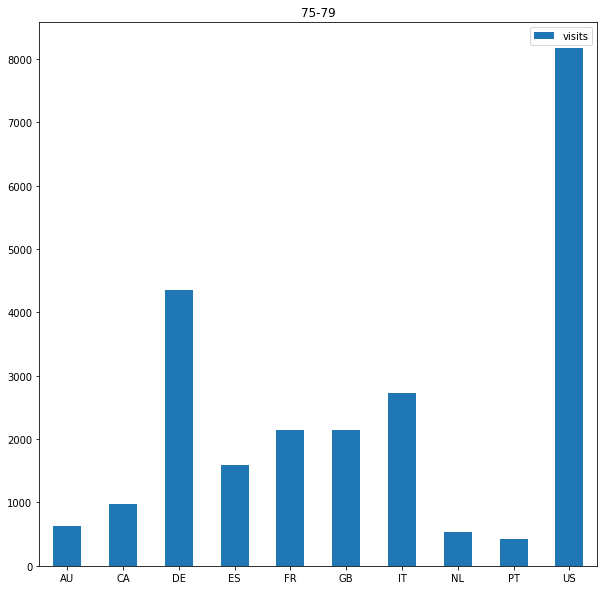

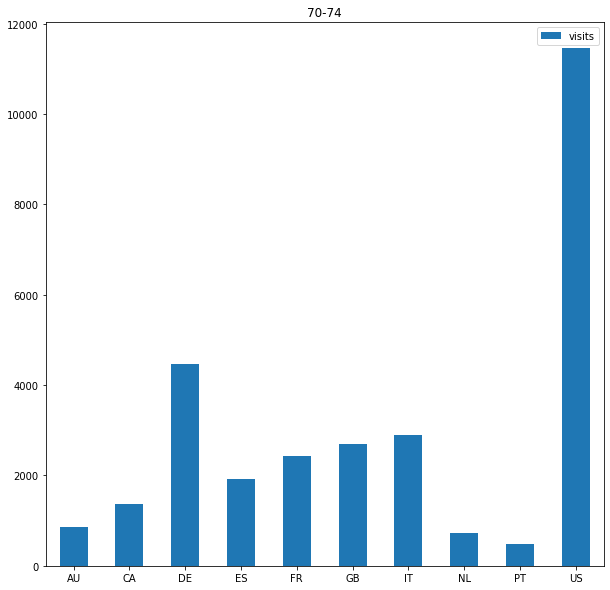

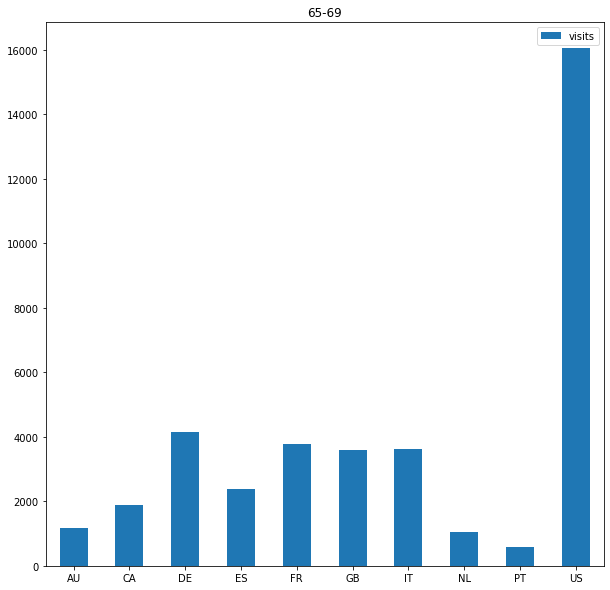

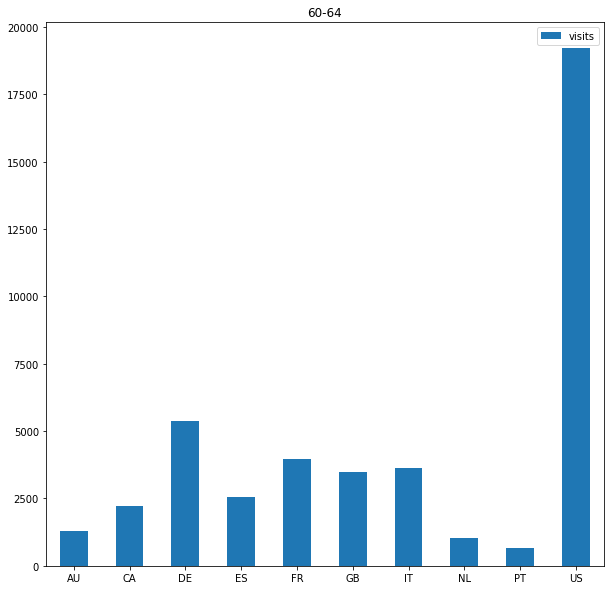

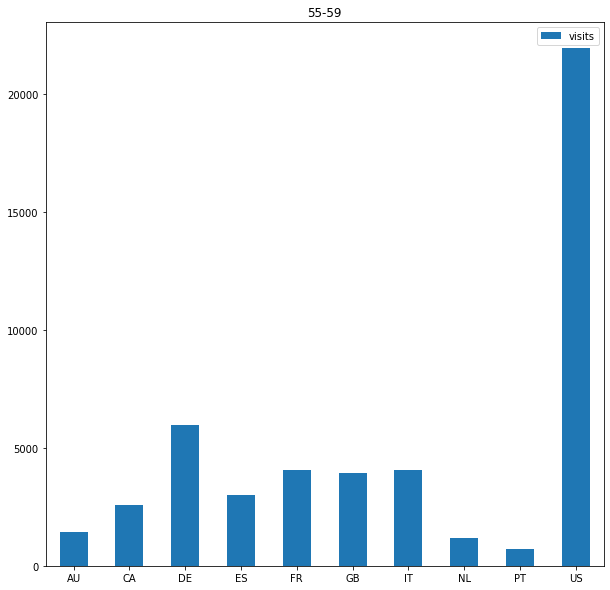

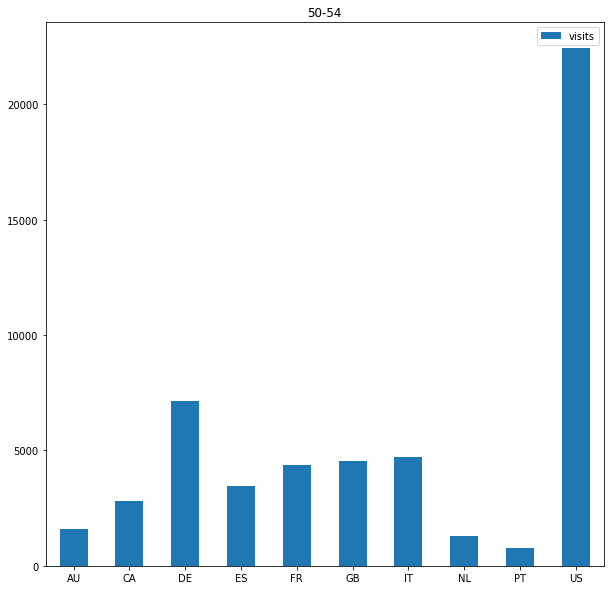

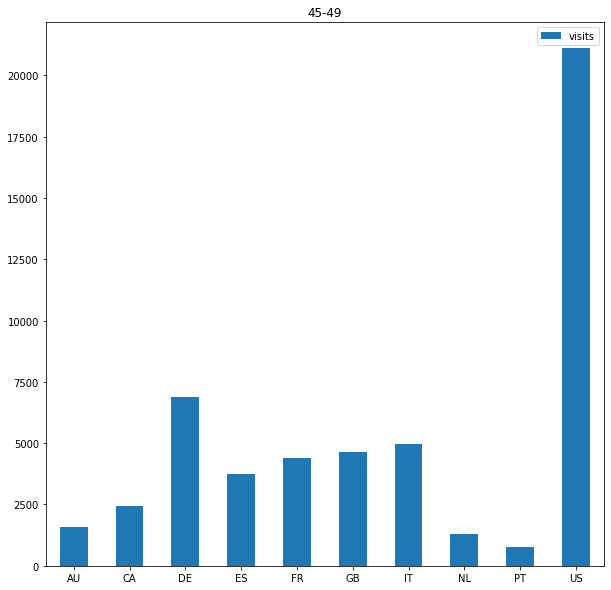

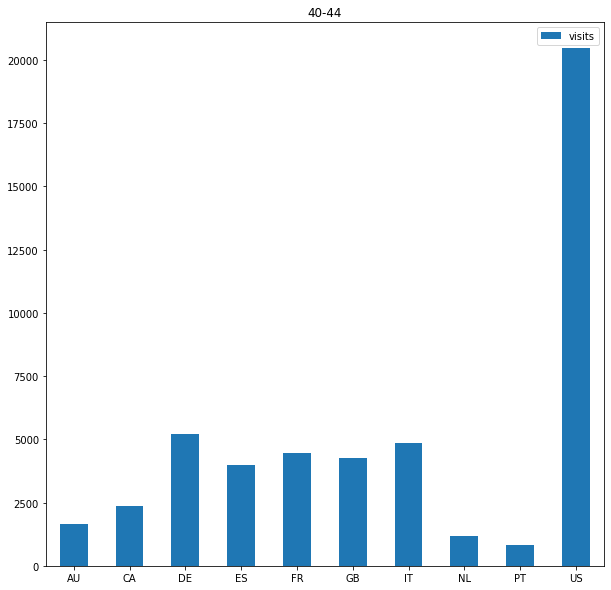

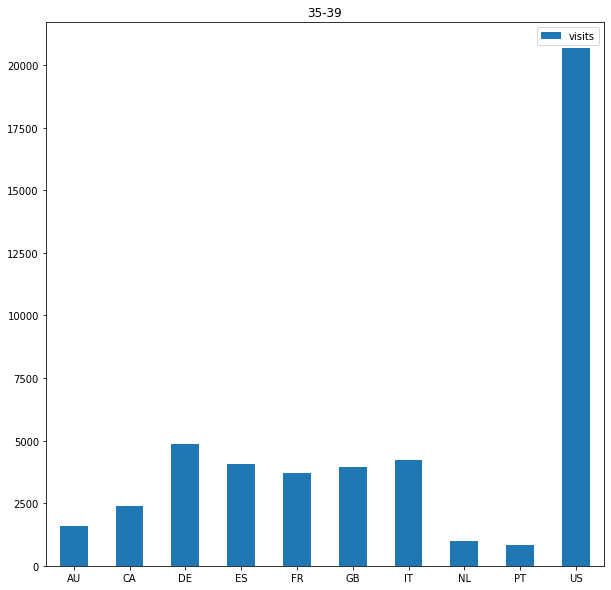

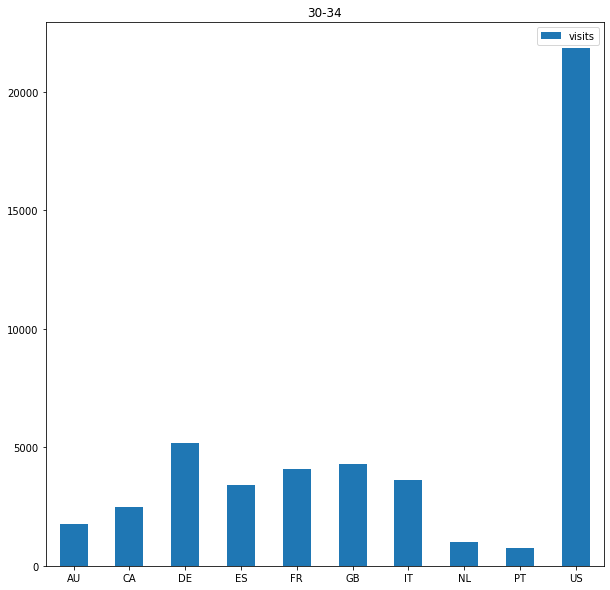

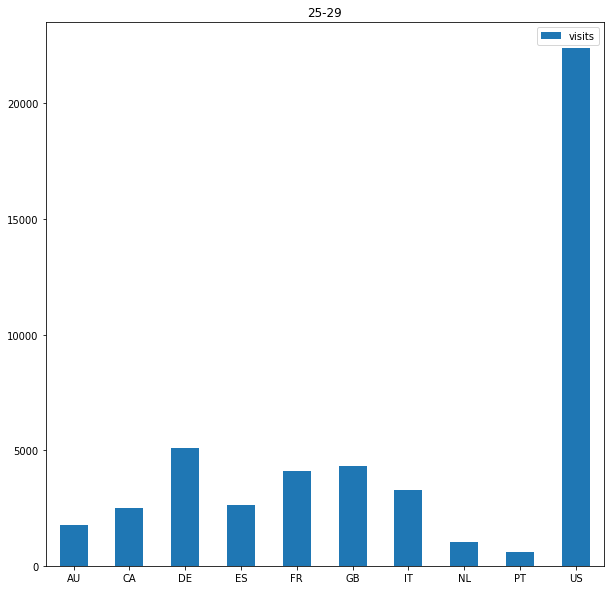

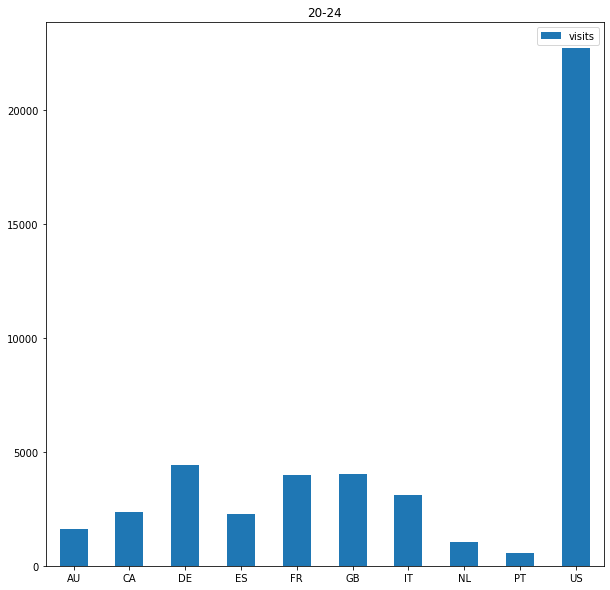

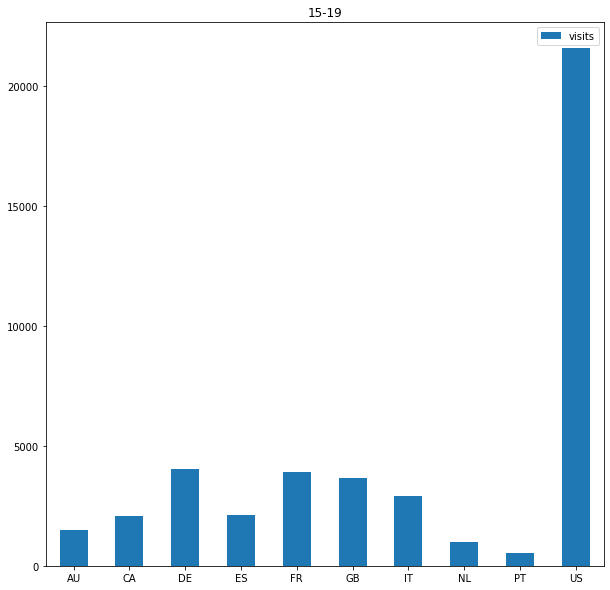

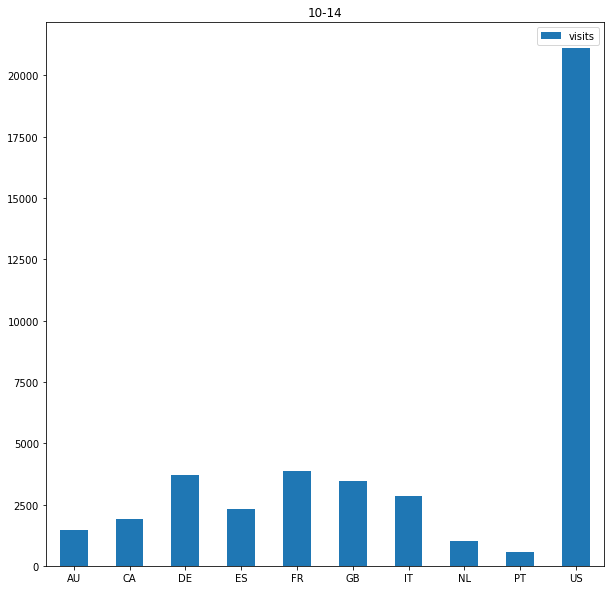

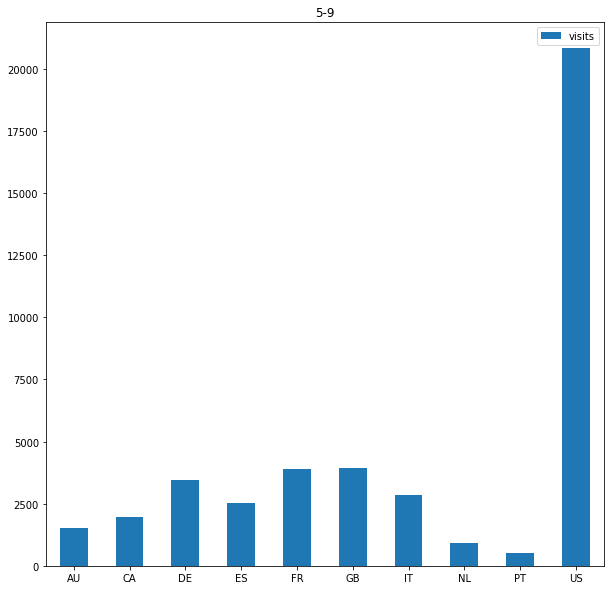

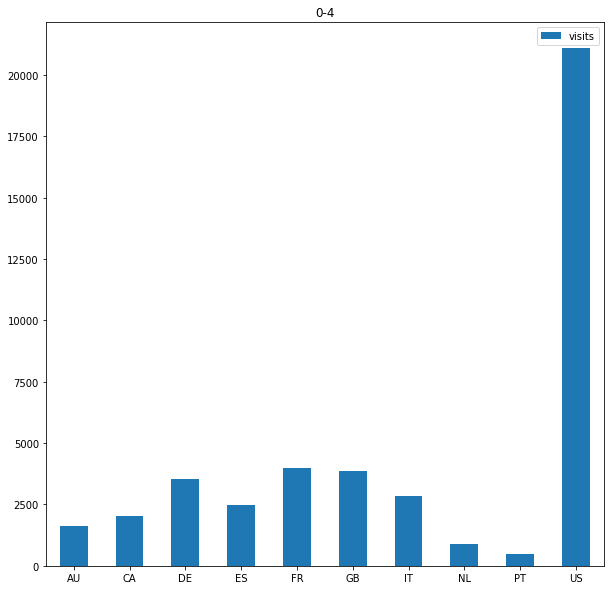

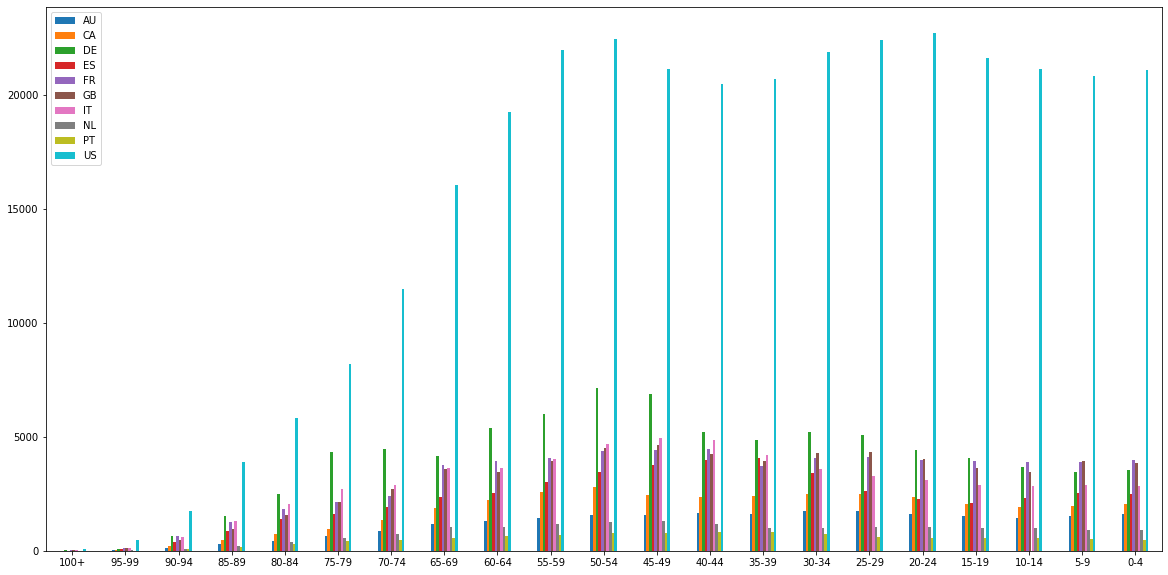

In [5]:
age_buckets = age_gender_stats['age_bucket'].unique()
bkts_dict = {}
for country_bucket in country_buckets:
    bkts_dict[country_bucket] = []
for age_bucket in age_buckets:
    country_arr = []
    for country_bucket in country_buckets:
        bkts_dict[country_bucket].append(
            age_gender_stats.loc[(age_gender_stats['country_destination'] == country_bucket) & (age_gender_stats['age_bucket'] == age_bucket)]['population_in_thousands'].sum()
        )
        country_arr.append(bkts_dict[country_bucket][-1])
    pd.DataFrame({'visits': country_arr}, index=country_buckets).plot.bar(rot=0, figsize=(10,10), title=age_bucket)
pd.DataFrame(bkts_dict, index=age_buckets).plot.bar(rot=0, figsize=(20,10))

### Visits Age Group Distribution for Each Country

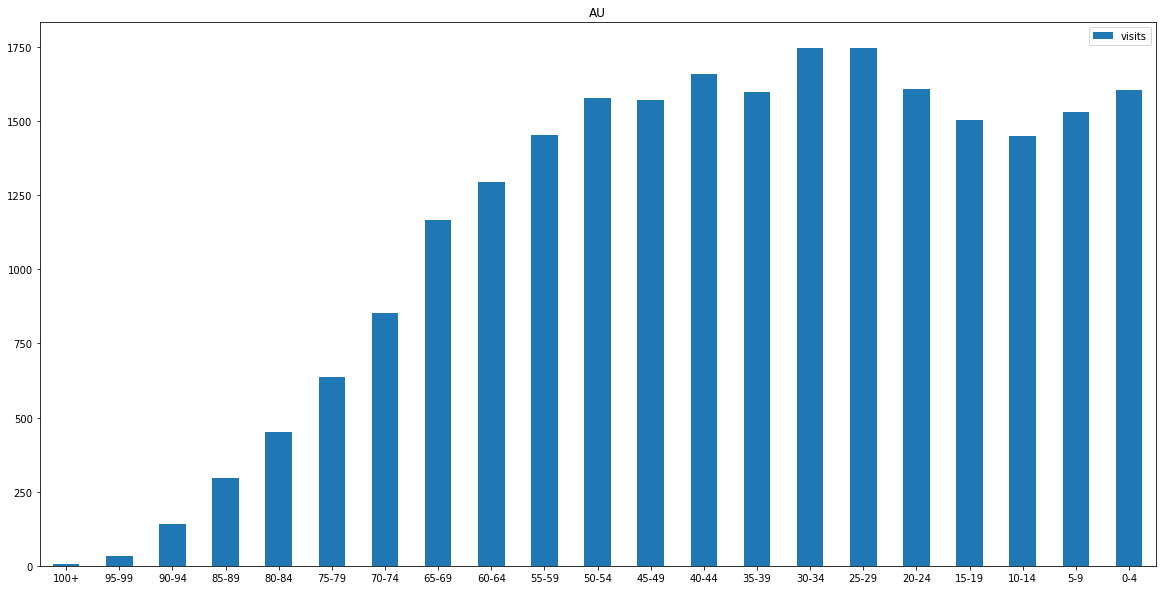

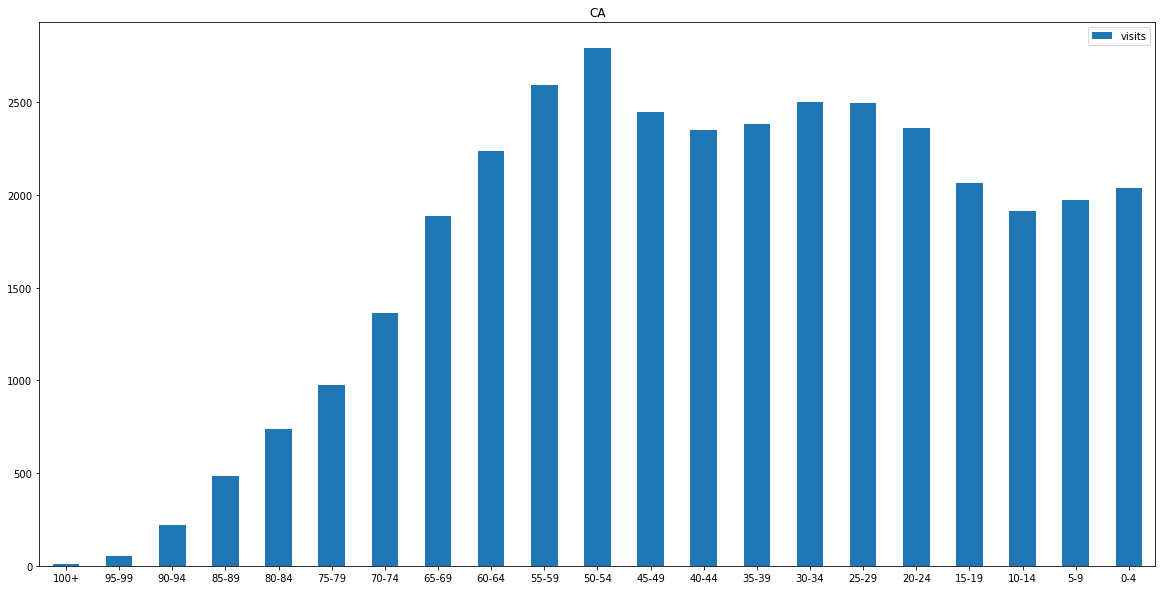

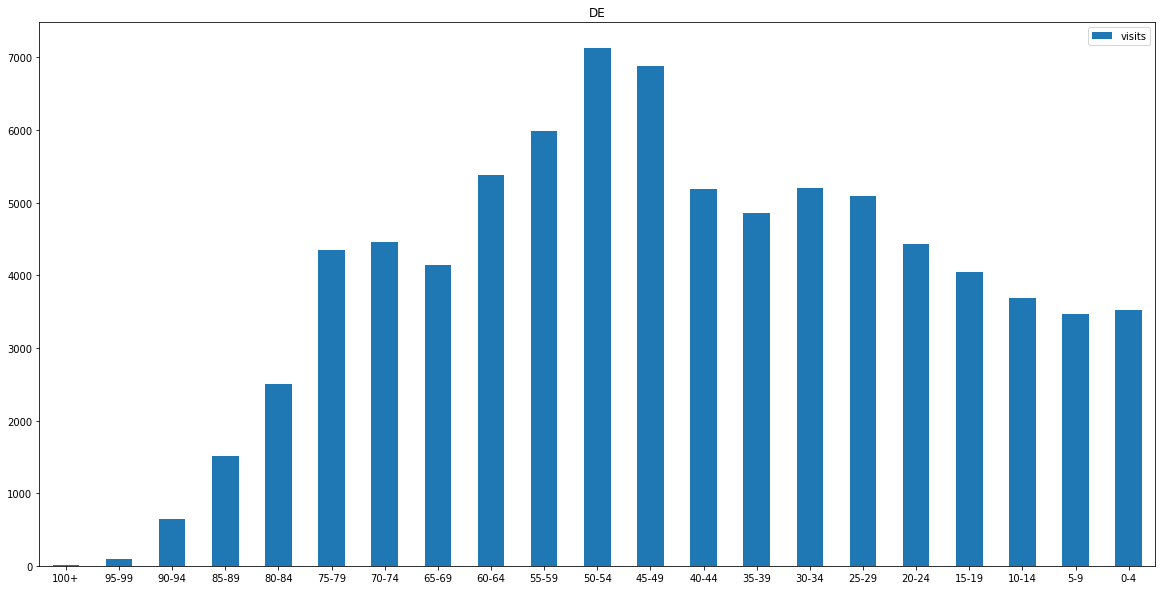

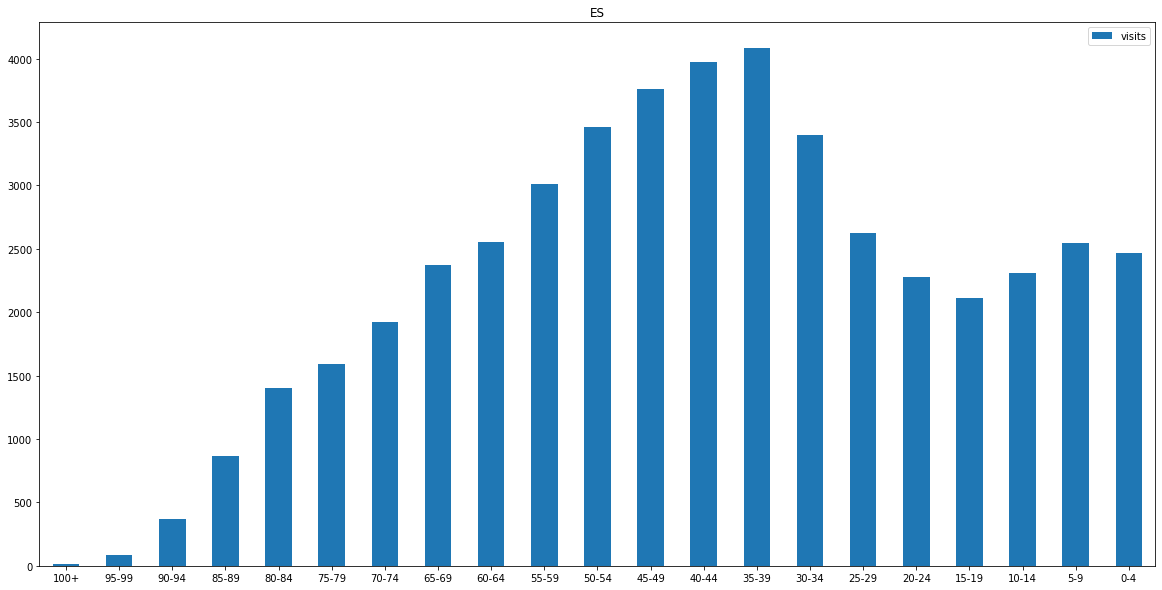

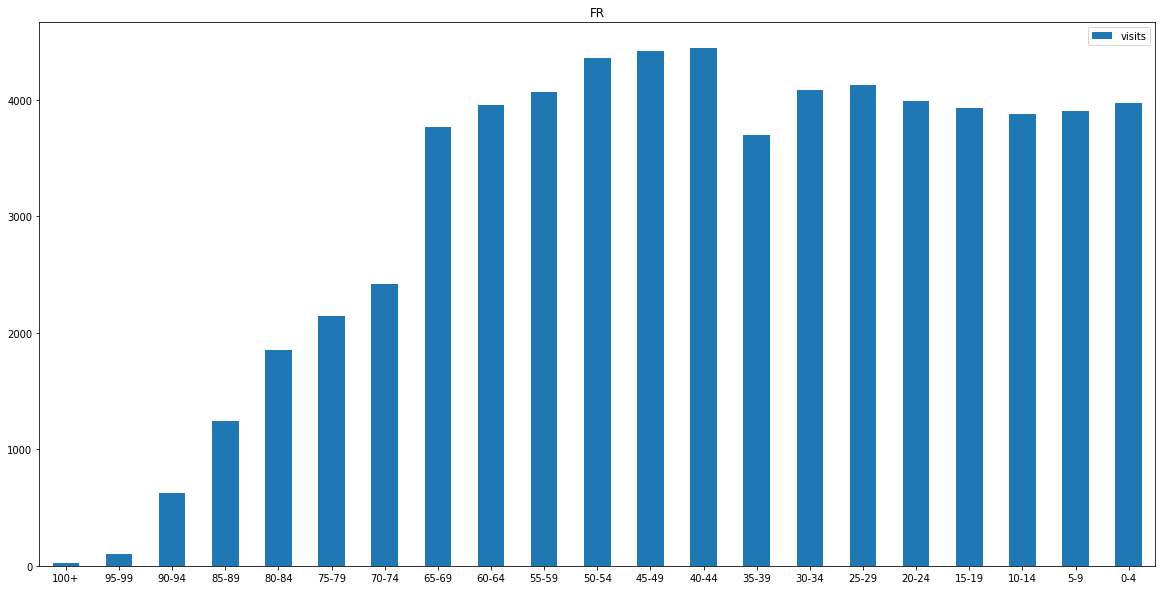

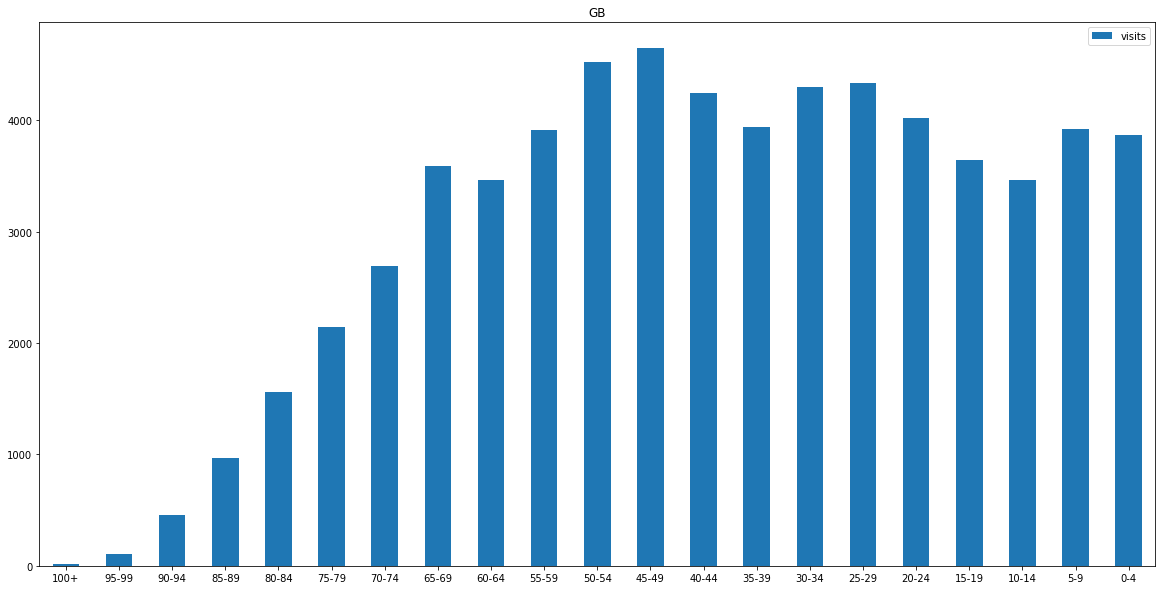

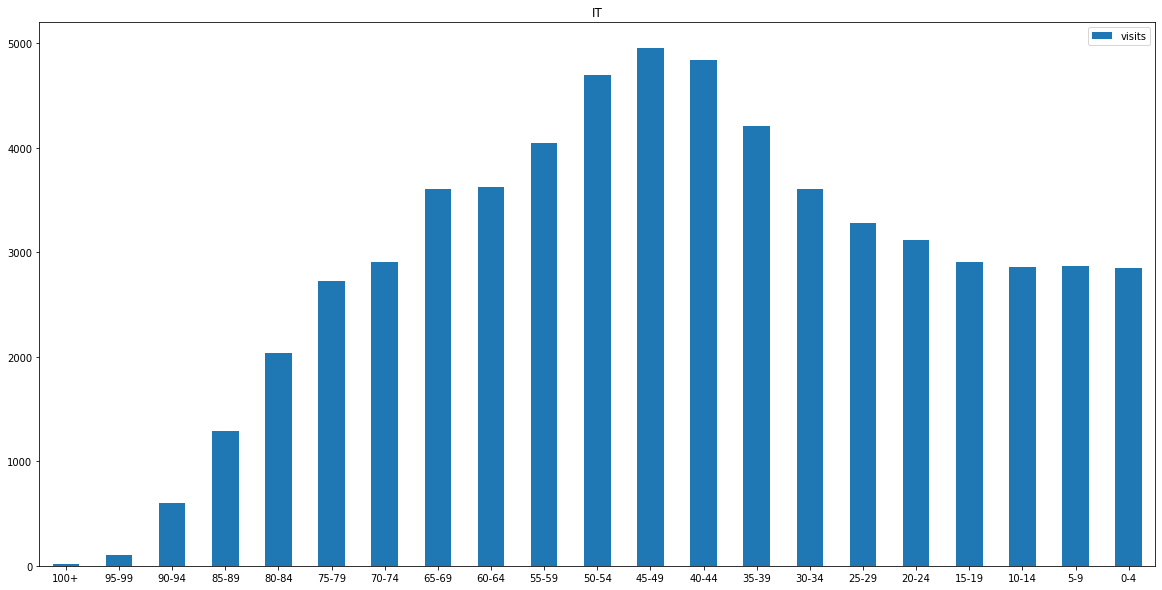

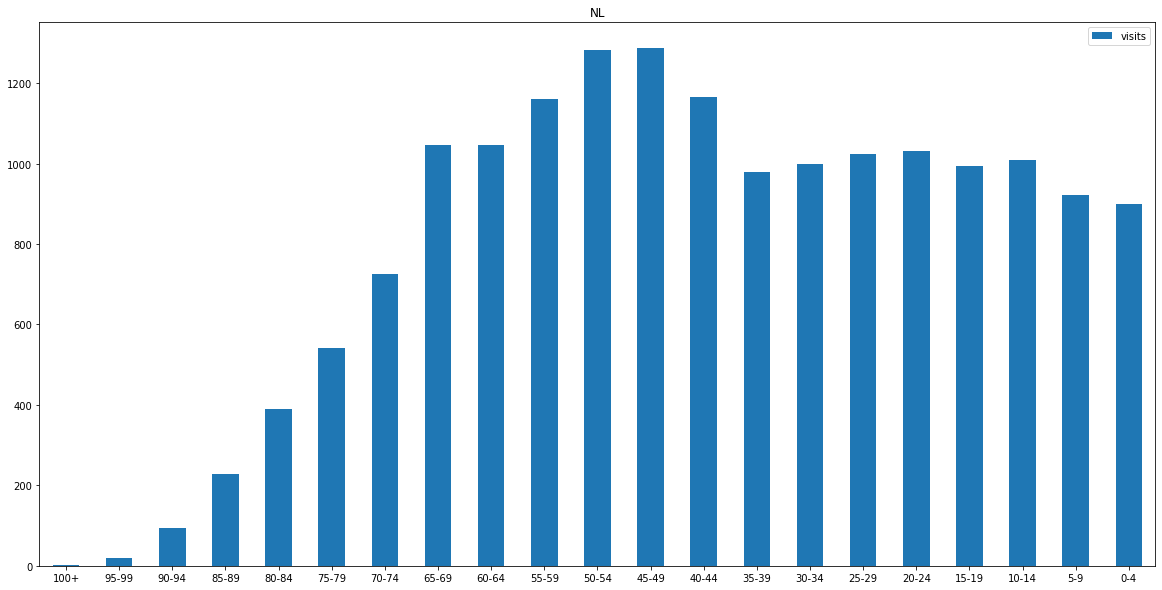

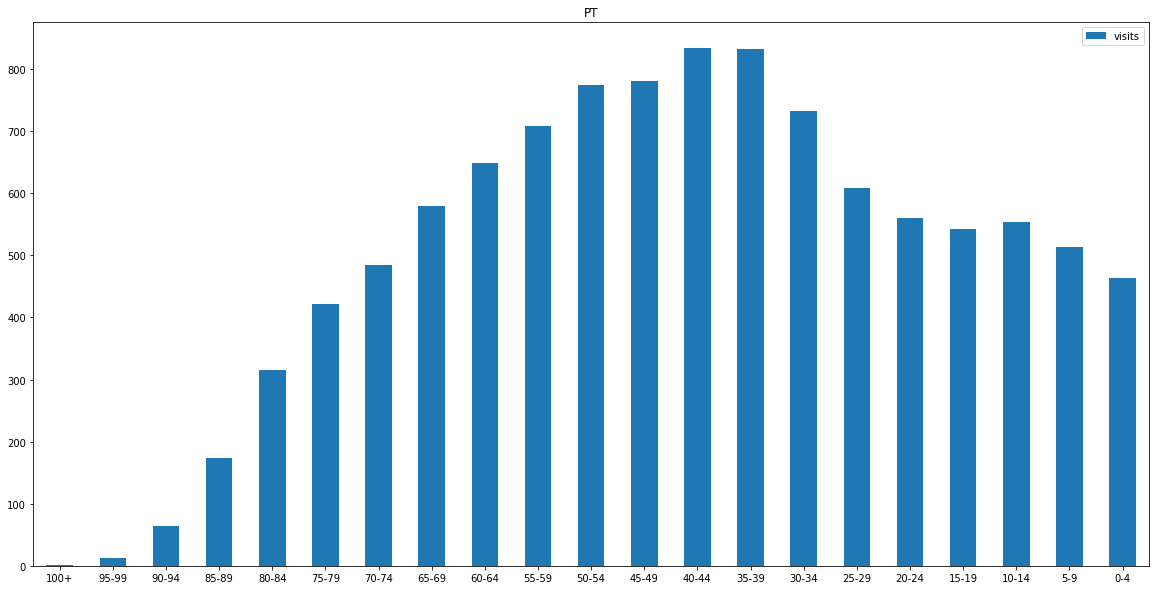

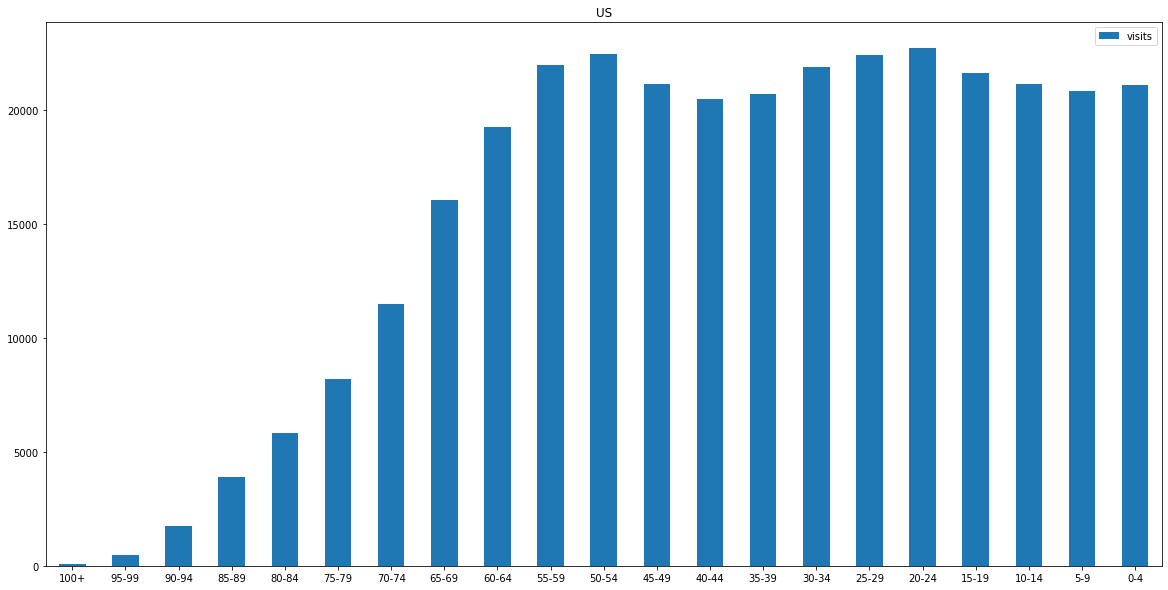

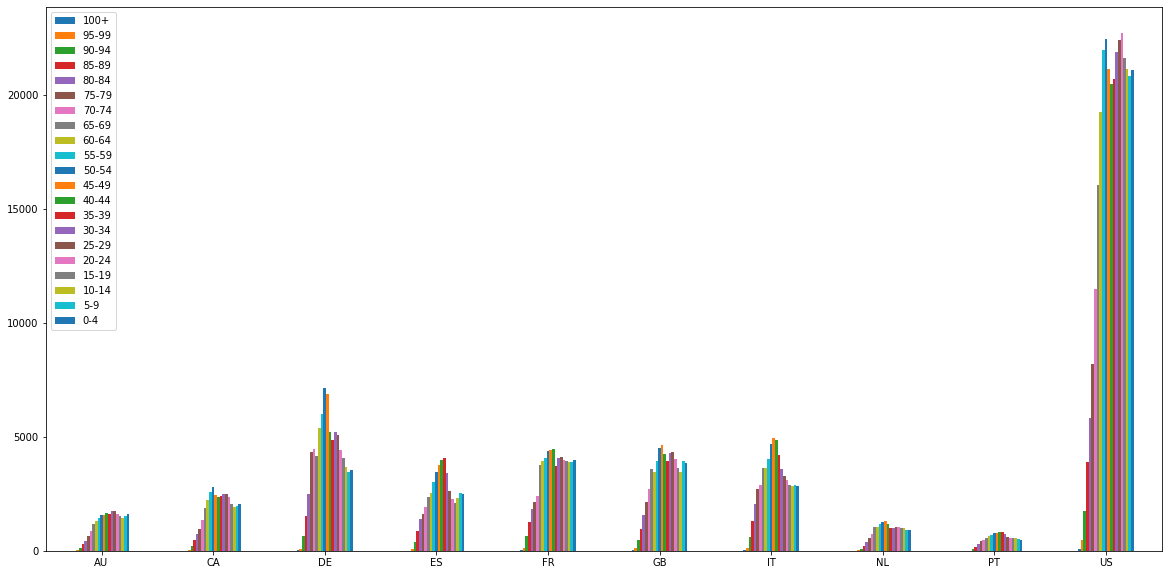

In [6]:
age_buckets = age_gender_stats['age_bucket'].unique()
bkts_dict = {}
for age_bucket in age_buckets:
    bkts_dict[age_bucket] = []
for country_bucket in country_buckets:
    ages = []
    for age_bucket in age_buckets:
        bkts_dict[age_bucket].append(
            age_gender_stats.loc[(age_gender_stats['country_destination'] == country_bucket) & (age_gender_stats['age_bucket'] == age_bucket)]['population_in_thousands'].sum()
        )
        ages.append(bkts_dict[age_bucket][-1])
    pd.DataFrame({'visits': ages}, index=age_buckets).plot.bar(rot=0, figsize=(20,10), title=country_bucket)
pd.DataFrame(bkts_dict, index=country_buckets).plot.bar(rot=0, figsize=(20,10))

## User Statistics
Some statistics and visualization on the available user data.

In [0]:
# drop invalid age ranges
train_users.drop(train_users[(train_users['age'] < 0) | (train_users['age'] > 120) ].index , inplace=True)


### Numerical Statistics for Each Destination Country

In [8]:
train_users.groupby(['country_destination']).describe()

timestamp_first_active                ... signup_flow      
                                     count          mean  ...         75%   max
country_destination                                       ...                  
AU                                   538.0  2.012977e+13  ...         0.0  25.0
CA                                  1422.0  2.012912e+13  ...         0.0  25.0
DE                                  1054.0  2.012804e+13  ...         0.0  25.0
ES                                  2240.0  2.012932e+13  ...         0.0  25.0
FR                                  5004.0  2.012870e+13  ...         0.0  25.0
GB                                  2314.0  2.012971e+13  ...         0.0  25.0
IT                                  2822.0  2.013031e+13  ...         0.0  25.0
NDF                               124138.0  2.013154e+13  ...         0.0  25.0
NL                                   757.0  2.012976e+13  ...         0.0  25.0
PT                                   216.0  2.013052e+13  ...         0.0  25.0
US                                 62116.0  2.012990e+13  ...         0.0  25.0
other                              10049.0  2.013106e+13  ...         0.0  25.0

[12 rows x 24 columns]

In [9]:
train_users.loc[(train_users['gender'] == 'MALE')].groupby(['country_destination']).describe()

timestamp_first_active                ... signup_flow      
                                     count          mean  ...         75%   max
country_destination                                       ...                  
AU                                   187.0  2.013124e+13  ...         0.0  25.0
CA                                   476.0  2.012846e+13  ...         2.0  25.0
DE                                   412.0  2.012852e+13  ...         0.0  25.0
ES                                   672.0  2.012889e+13  ...         0.0  25.0
FR                                  1331.0  2.012831e+13  ...         0.0  25.0
GB                                   678.0  2.012902e+13  ...         0.0  25.0
IT                                   698.0  2.012986e+13  ...         0.0  25.0
NDF                                26592.0  2.012990e+13  ...         0.0  25.0
NL                                   277.0  2.012928e+13  ...         0.0  25.0
PT                                    69.0  2.013035e+13  ...         0.0  25.0
US                                 19375.0  2.012991e+13  ...         0.0  25.0
other                               3424.0  2.013073e+13  ...         0.0  25.0

[12 rows x 24 columns]

In [10]:
train_users.loc[(train_users['gender'] == 'FEMALE')].groupby(['country_destination']).describe()

timestamp_first_active                ... signup_flow      
                                     count          mean  ...         75%   max
country_destination                                       ...                  
AU                                   207.0  2.012835e+13  ...         0.0  25.0
CA                                   453.0  2.012922e+13  ...         0.0  25.0
DE                                   355.0  2.012750e+13  ...         0.0  25.0
ES                                   850.0  2.012944e+13  ...         0.0  25.0
FR                                  1949.0  2.012850e+13  ...         0.0  25.0
GB                                   875.0  2.012952e+13  ...         0.0  25.0
IT                                  1080.0  2.012957e+13  ...         0.0  25.0
NDF                                30801.0  2.012983e+13  ...         0.0  25.0
NL                                   251.0  2.012940e+13  ...         0.0  25.0
PT                                    77.0  2.012895e+13  ...         0.0  25.0
US                                 22539.0  2.012972e+13  ...         0.0  25.0
other                               3137.0  2.013037e+13  ...         0.0  25.0

[12 rows x 24 columns]

In [11]:
train_users.loc[(train_users['gender'] == 'OTHER')].groupby(['country_destination']).describe()

timestamp_first_active                ... signup_flow      
                                     count          mean  ...         75%   max
country_destination                                       ...                  
AU                                     1.0  2.013082e+13  ...        0.00   0.0
CA                                     5.0  2.012451e+13  ...        0.00   2.0
DE                                     3.0  2.012388e+13  ...        0.00   0.0
ES                                     4.0  2.012049e+13  ...        0.75   3.0
FR                                    13.0  2.012838e+13  ...        0.00  25.0
GB                                     3.0  2.012691e+13  ...        1.50   3.0
IT                                     5.0  2.012859e+13  ...        0.00   0.0
NDF                                  105.0  2.012867e+13  ...        0.00  25.0
NL                                     3.0  2.013395e+13  ...       11.50  23.0
PT                                     1.0  2.012092e+13  ...        0.00   0.0
US                                   115.0  2.012706e+13  ...        2.00  25.0
other                                 21.0  2.013016e+13  ...        0.00  25.0

[12 rows x 24 columns]

### Getting How Much Time Users Have Spent Doing Each Action

In [0]:
user_actions_time = sessions.groupby(['user_id', 'action']).sum().reset_index()
user_actions_time = user_actions_time.pivot_table(values='secs_elapsed',columns='action',index=['user_id'])
user_actions_time.columns.name = None
user_actions_time = user_actions_time.reset_index()
user_actions_time = user_actions_time.fillna(0)

### Adding Users Activity to the Test and Train Datasets

In [13]:
train_users = train_users.set_index('id').join(user_actions_time.set_index('user_id')).reset_index()
test_users = test_users.set_index('id').join(user_actions_time.set_index('user_id')).reset_index()

test_users.columns


Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel',
       ...
       'view', 'views', 'views_campaign', 'views_campaign_rules',
       'webcam_upload', 'weibo_signup_referral_finish', 'why_host', 'widget',
       'wishlists', 'zendesk_login_jwt'],
      dtype='object', length=374)

In [0]:
test_users = test_users.fillna(0)
train_users = train_users.fillna(0)

In [15]:
for column in train_users.columns:
    print(column)
    print(train_users.groupby(['country_destination'])[column].describe())

Streaming output truncated to the last 5000 lines.
AU                      538.0    0.000000      0.000000  ...  0.0  0.0        0.0
CA                     1422.0    0.000000      0.000000  ...  0.0  0.0        0.0
DE                     1054.0    0.000000      0.000000  ...  0.0  0.0        0.0
ES                     2240.0    0.000000      0.000000  ...  0.0  0.0        0.0
FR                     5004.0  103.413869   7315.389198  ...  0.0  0.0   517483.0
GB                     2314.0    0.000000      0.000000  ...  0.0  0.0        0.0
IT                     2822.0  581.532247  30892.446738  ...  0.0  0.0  1641084.0
NDF                  124138.0   86.320442   9930.651317  ...  0.0  0.0  2168882.0
NL                      757.0    0.000000      0.000000  ...  0.0  0.0        0.0
PT                      216.0    0.000000      0.000000  ...  0.0  0.0        0.0
US                    62116.0   79.115590   7288.812624  ...  0.0  0.0  1387809.0
other                 10049.0    4.489302    39

### Splitting Dates to Get Seasonal Statistics 

In [0]:
#date_account_created
dac = np.vstack(train_users.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
train_users['dac_year'] = dac[:,0]
train_users['dac_month'] = dac[:,1]
train_users['dac_day'] = dac[:,2]
train_users = train_users.drop(['date_account_created'], axis=1)

dac = np.vstack(test_users.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
test_users['dac_year'] = dac[:,0]
test_users['dac_month'] = dac[:,1]
test_users['dac_day'] = dac[:,2]
test_users = test_users.drop(['date_account_created'], axis=1)

#timestamp_first_active
tfa = np.vstack(train_users.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
train_users['tfa_year'] = tfa[:,0]
train_users['tfa_month'] = tfa[:,1]
train_users['tfa_day'] = tfa[:,2]
train_users = train_users.drop(['timestamp_first_active'], axis=1)

tfa = np.vstack(test_users.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
test_users['tfa_year'] = tfa[:,0]
test_users['tfa_month'] = tfa[:,1]
test_users['tfa_day'] = tfa[:,2]
test_users = test_users.drop(['timestamp_first_active'], axis=1)

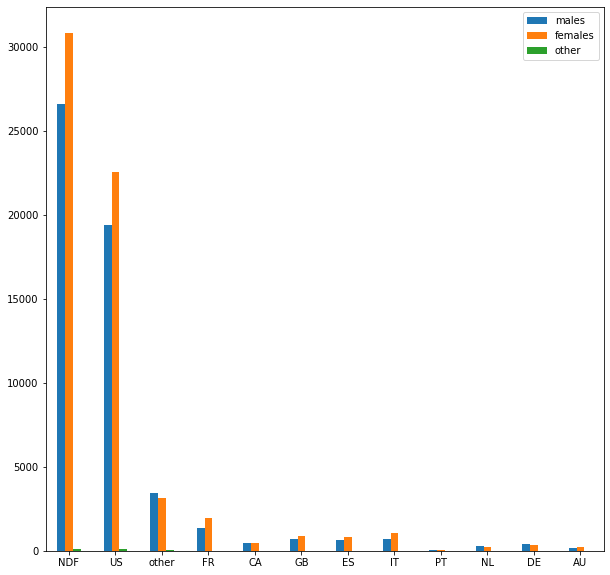

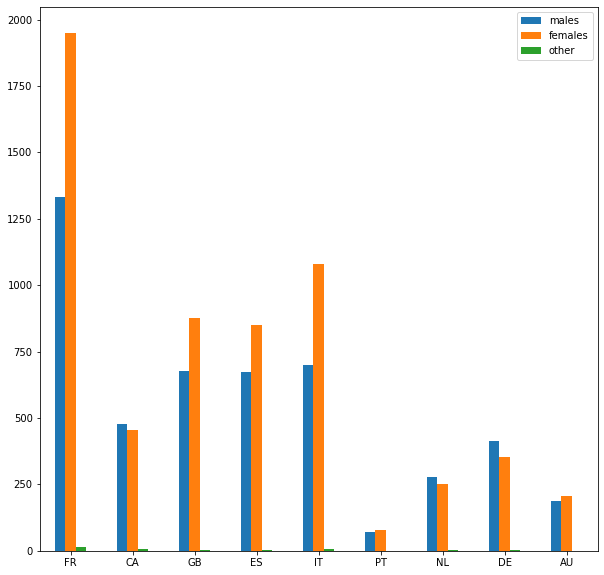

In [20]:
# gender based
country_buckets = train_users['country_destination'].unique()
males = []
females = []
other = []

for bucket in country_buckets:
    males.append(
        train_users.loc[(train_users['country_destination'] == bucket) & (train_users['gender'] == "MALE")]['country_destination'].count()
    )
    females.append(
        train_users.loc[(train_users['country_destination'] == bucket) & (train_users['gender'] == "FEMALE")]['country_destination'].count()
    )
    other.append(
        train_users.loc[(train_users['country_destination'] == bucket) & (train_users['gender'] == "OTHER")]['country_destination'].count()
    )

pd.DataFrame({'males': males, 'females': females, 'other': other}, index=country_buckets).plot.bar(rot=0, figsize=(10,10))

males = []
females = []
other = []
country_buckets = np.delete(country_buckets, np.where(country_buckets == "NDF"))
country_buckets = np.delete(country_buckets, np.where(country_buckets == "US"))
country_buckets = np.delete(country_buckets, np.where(country_buckets == "other"))
for bucket in country_buckets:
    if not "NDF" in bucket and not "US" in bucket:
        males.append(
        train_users.loc[(train_users['country_destination'] == bucket) & (train_users['gender'] == "MALE")]['country_destination'].count()
        )
        females.append(
        train_users.loc[(train_users['country_destination'] == bucket) & (train_users['gender'] == "FEMALE")]['country_destination'].count()
        )
        other.append(
            train_users.loc[(train_users['country_destination'] == bucket) & (train_users['gender'] == "OTHER")]['country_destination'].count()
        )
pd.DataFrame({'males': males, 'females': females, 'other': other}, index=country_buckets).plot.bar(rot=0, figsize=(10,10))

In [0]:
print(train_users['gender'].unique())

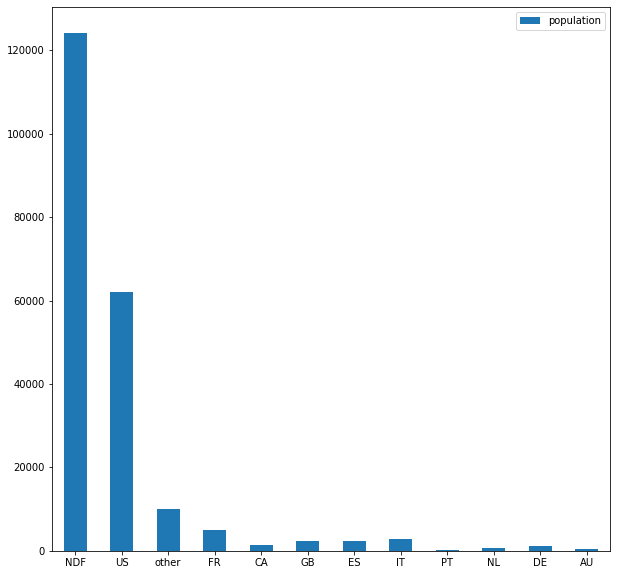

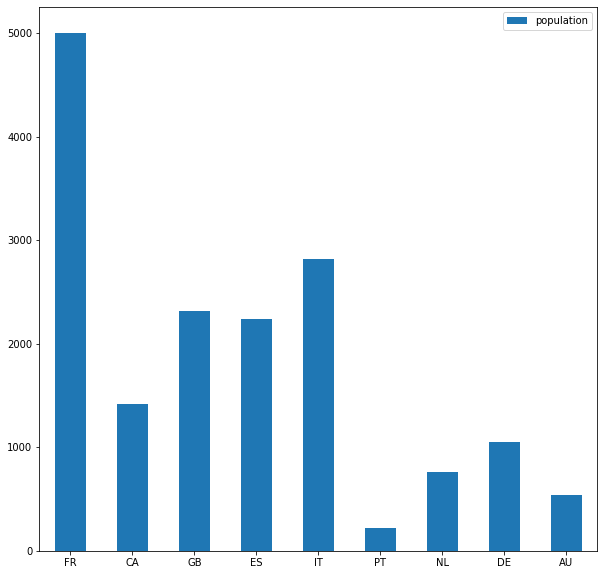

In [31]:
# gender based
country_buckets = train_users['country_destination'].unique()
population = []

for bucket in country_buckets:
    population.append(
        train_users.loc[(train_users['country_destination'] == bucket)]['country_destination'].count()
    )
pd.DataFrame({'population': population}, index=country_buckets).plot.bar(rot=0, figsize=(10,10))

population = []
country_buckets = np.delete(country_buckets, np.where(country_buckets == "NDF"))
country_buckets = np.delete(country_buckets, np.where(country_buckets == "US"))
country_buckets = np.delete(country_buckets, np.where(country_buckets == "other"))
for bucket in country_buckets:
    if not "NDF" in bucket and not "US" in bucket:
        population.append(
            train_users.loc[(train_users['country_destination'] == bucket)]['country_destination'].count()
        )
pd.DataFrame({'population': population}, index=country_buckets).plot.bar(rot=0, figsize=(10,10))

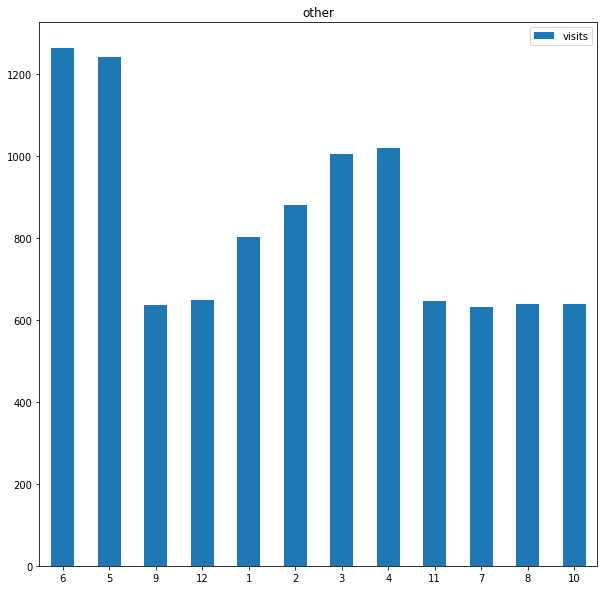

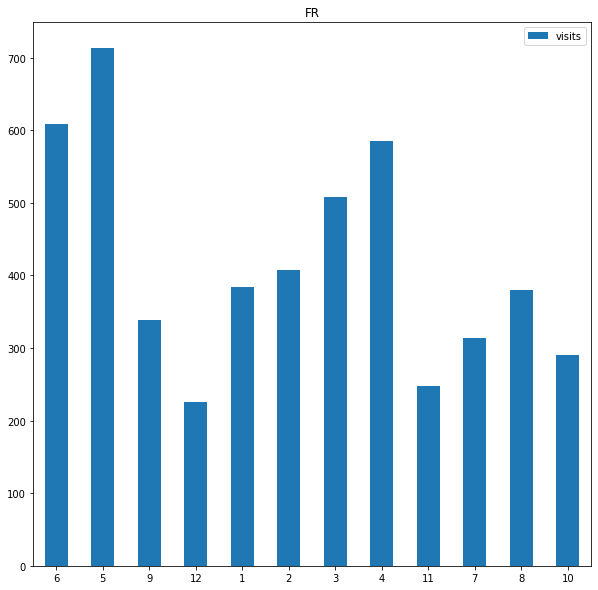

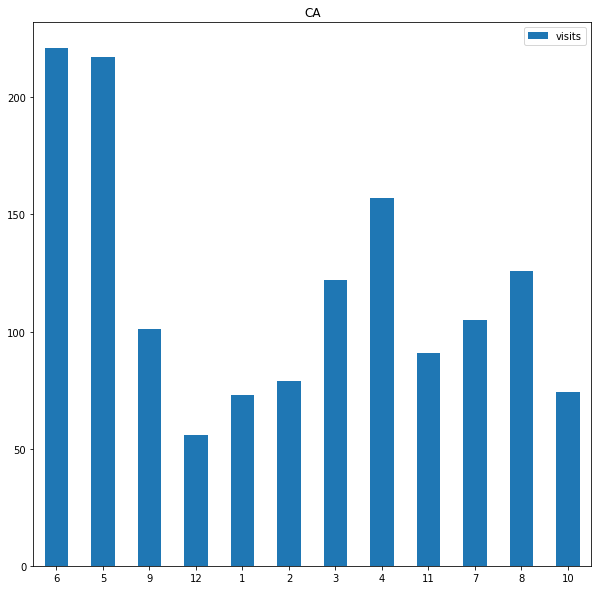

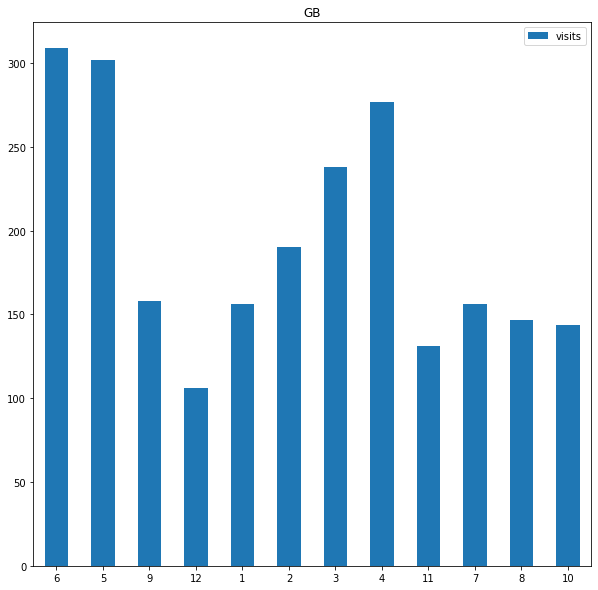

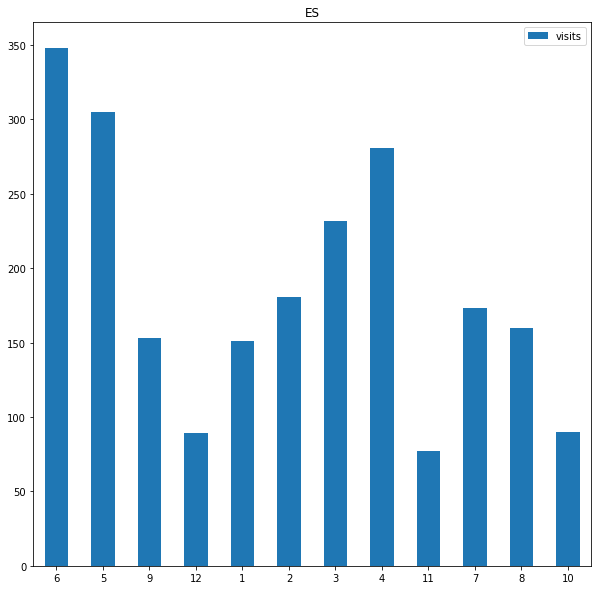

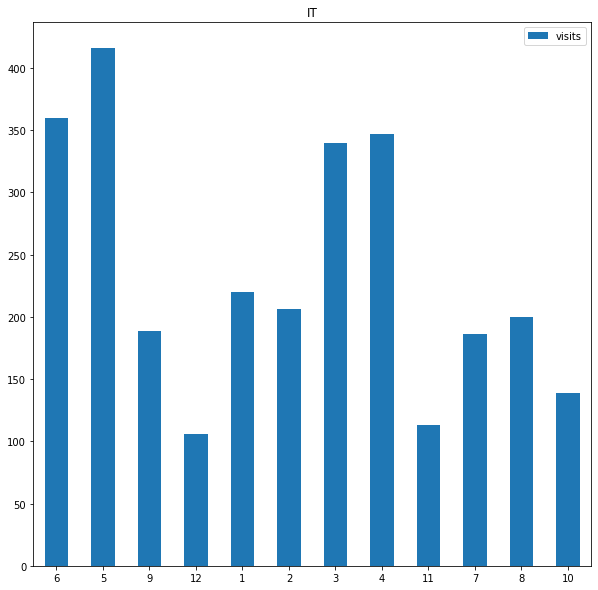

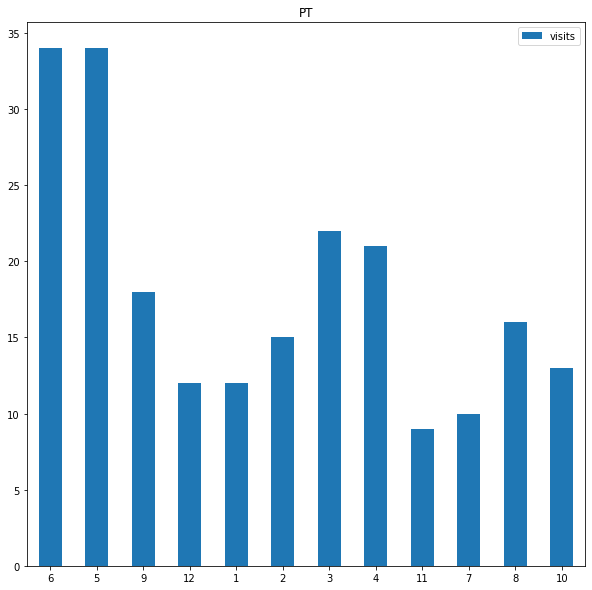

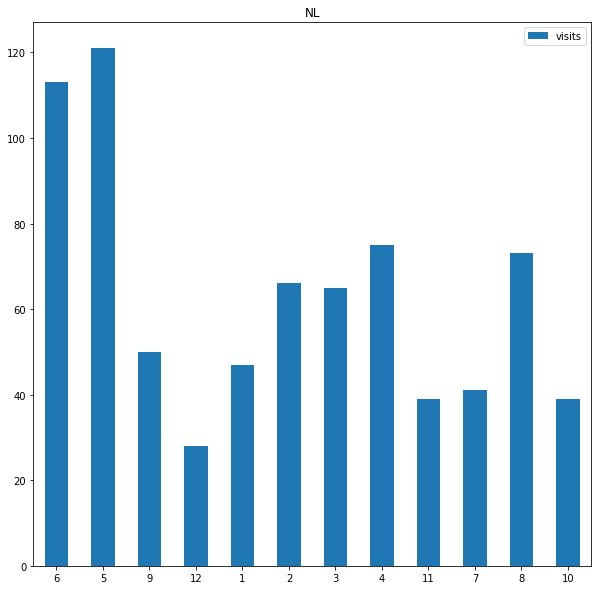

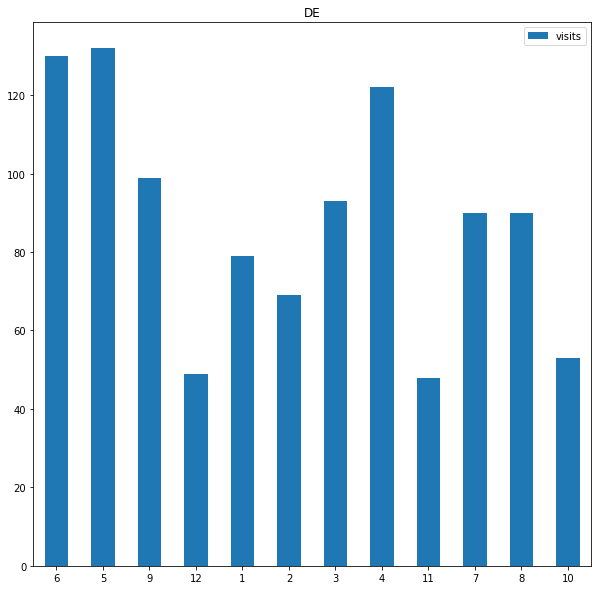

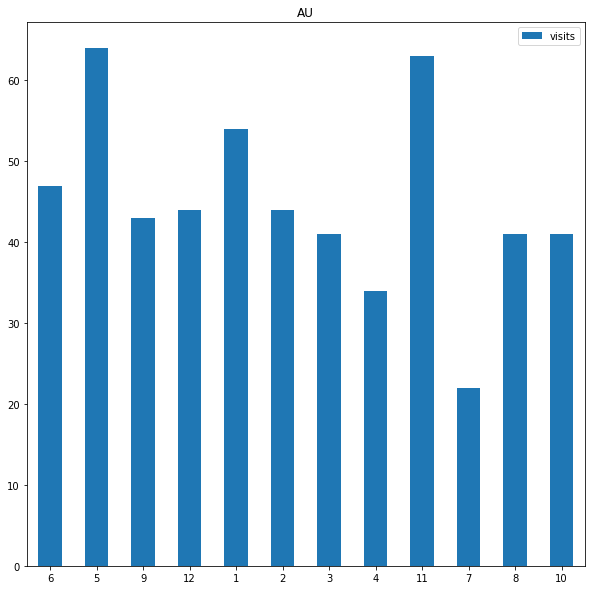

In [26]:
country_buckets = train_users['country_destination'].unique()

month_buckets = train_users['dac_month'].unique()
bkts_dict = {}
country_buckets = np.delete(country_buckets, np.where(country_buckets == "NDF"))
country_buckets = np.delete(country_buckets, np.where(country_buckets == "US"))
for month in month_buckets:
    bkts_dict[month] = []
for country in country_buckets:
    country_arr = []
    for month in month_buckets:
        bkts_dict[month].append(
            train_users.loc[(train_users['country_destination'] == country) & (train_users['dac_month'] == month)]['id'].count()
        )
        country_arr.append(bkts_dict[month][-1])
    pd.DataFrame({'visits': country_arr}, index=month_buckets).plot.bar(rot=0, figsize=(10,10), title=country)


# Building the Model

## One-hot Encoding Features

In [0]:
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier

#One-hot-encoding features
ohe_feats = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel',
             'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
x_train = train_users
y_train = x_train['country_destination'].values
x_train = x_train.drop(['country_destination'], axis=1)
x_test = test_users

 


for f in ohe_feats:
    x_train_ohe = pd.get_dummies(x_train[f], prefix=f)
    x_train = x_train.drop([f], axis=1)
    x_train = pd.concat((x_train, x_train_ohe), axis=1)

    x_test_ohe = pd.get_dummies(x_test[f], prefix=f)
    x_test = x_test.drop([f], axis=1)
    x_test = pd.concat((x_test, x_test_ohe), axis=1)

train_ids = x_train['id'].values
test_ids = x_test['id'].values

x_train = x_train.drop(['id'], axis=1)
x_test = x_test.drop(['id'], axis=1)

x_train = x_train.drop(['date_first_booking'], axis=1)



In [19]:
for col in x_test.columns:
    if not col in x_train.columns:
        x_test = x_test.drop([col], axis=1)

for col in x_train.columns:
    if not col in x_test.columns:
        x_train = x_train.drop([col], axis=1)
print(x_train.columns)
print(x_train.columns.shape)
print(x_test.columns)
print(x_test.columns.shape)
x_test = x_test.values


label_encoder = LabelEncoder()
x_train = x_train.values
y_train = label_encoder.fit_transform(y_train)



xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)                  
xgb.fit(x_train, y_train)



Index(['age', '10', '11', '12', '15', 'about_us', 'accept_decline', 'account',
       'acculynk_bin_check_failed', 'acculynk_bin_check_success',
       ...
       'first_browser_Opera Mini', 'first_browser_Opera Mobile',
       'first_browser_Pale Moon', 'first_browser_Safari',
       'first_browser_SeaMonkey', 'first_browser_Silk',
       'first_browser_SiteKiosk', 'first_browser_Sogou Explorer',
       'first_browser_Yandex.Browser', 'first_browser_wOSBrowser'],
      dtype='object', length=475)
(475,)
Index(['age', '10', '11', '12', '15', 'about_us', 'accept_decline', 'account',
       'acculynk_bin_check_failed', 'acculynk_bin_check_success',
       ...
       'first_browser_Opera Mini', 'first_browser_Opera Mobile',
       'first_browser_Pale Moon', 'first_browser_Safari',
       'first_browser_SeaMonkey', 'first_browser_Silk',
       'first_browser_SiteKiosk', 'first_browser_Sogou Explorer',
       'first_browser_Yandex.Browser', 'first_browser_wOSBrowser'],
      dtype='object',

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.5, verbosity=1)

In [0]:


y_pred = xgb.predict_proba(x_test)

#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(test_ids)):
    idx = test_ids[i]
    ids += [idx] * 5
    cts += label_encoder.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('sub.csv',index=False)

In [0]:
train_users.groupby(['count'])